# Uso de algoritmos genéticos para el estudio de espacio de parámetros en materia oscura. 
## Por: Gustavo A. Castrillón. 

# Algoritmos genéticos. 

En general, estas técnicas de computación son algoritmos que se centran en recrear los principios darwinianos para la resolución automatizada de problemas. Como se menciona en \cite{deasurvey} la computación evolutiva utiliza el progreso iterativo, como crecimiento o desarrollo de una población. Esta población es seleccionada por medio de una búsqueda aleatoria (o algoritmos de Monte Carlo) guiada por un procesamiento paralelo para lograr obtener algo en particular. 

La evolución diferencial (en inglés differential evolution DE) es un algoritmo evolutivo simple, pero potente para la optimización global y fue introducido por Price y Storn \cite{prince_y_storn}. Estos tienen una ventaja sobre otros tipos de métodos numéricos. Y es por el hecho de que sólo requieren una función objetivo, además de que no se necesita que la función sea continua o diferenciable, lo que ayuda a estudiar fenómenos que son desconocidos en primera instancia.

Como se describe en \cite{sastudy} el algoritmo comienza con una serie de soluciones supuestas, la rutina multipunto actualiza una o más soluciones de manera sinérgica con la esperanza de dirigir a la población hacia el óptimo. Los valores adecuados para estudiar el espacio de parámetros, es a medida, dependiente del problema y requiere en ocasiones un conocimiento previo del mismo, o al menos en su medida en conocer los posibles rangos necesarios para entender el fenómeno. 

Existen diferentes variantes relacionadas a los algoritmos genéticos. En este trabajo se usó el DE que está en la librería de Scipy en Python \cite{depython}. 

A esta función se le pasa diferentes tipos de parámetros para poder trabajar, los cuales son: función, ligaduras, argumentos, estrategia, tamaño de la población, tolerancia, índice de mutación, recombinación y semilla. Puede haber otros parámetros de la rutina pero no son de interés tratarlos aquí. 

#### Función: 
La función es el objeto matemático o físico que deseamos estudiar en nuestro sistema. Independiente del tipo de función, esta estará compuesta por de la siguiente forma: $f(x; \theta_{1},\text{...} \theta_{n}, \sigma_{1}, \text{…}, \sigma_{n})$. Donde $x$ son los valores variables. $\theta_{1}$, …, $\theta_{n}$, los parámetros de estudio del sistema y $\sigma_{1}$, … , $\sigma_{n}$ los parámetros libres.  

#### Ligaduras:
En ligaduras se debe ingresar el rango de valores respectivos para cada parámetro de estudio, esto es lo que delimitará el problema. Por ejemplo, si unos de los parámetros de estudio es la masa de una partícula de materia oscura, se puede establecer el bounds o ligadura dentro de los rangos de $10$ GeV y $10$ TeV.

#### Estrategia:
Este consiste en usar un método en específico para generar las mutaciones del modelo, estas son construidas. En el algoritmo de scipy, están presentes diferentes tipos de métodos, los cuales son: 


\begin{center}
\begin{tabular}{l|c|r}
best1bin & best1exp & rand1exp \\
randtobest1exp & currenttobest1exp & best2exp \\
rand2exp & randtobest1bin & currenttobest1bin \\
best2bin & rand2bin & rand1bin \\
\end{tabular}
\end{center}

En el blog \cite{blog_pablo}, se explica que cuando una estrategia se inicia con ''(rand)'', implica la generación de dos vectores aleatorios de la población y su posterior mezcla mediante dos tipos de cruzamientos. La estrategia ''(bin)'' se basa en un enfoque binomial, donde se introduce una probabilidad "p" para determinar cuál gen será heredado por el hijo de los dos vectores seleccionados. En otras palabras, existe una probabilidad ''p'' de adquirir una característica del primer padre y una probabilidad de ''1-p'' de adquirir una característica del segundo padre.

Por otro lado, la estrategia ''(exp)'' es de tipo exponencial, donde se eligen de manera aleatoria dos posiciones en un vector del padre. Luego, se extraen todos los valores numéricos consecutivos ubicados entre esas dos posiciones en cada uno de los vectores padre. Estos dos nuevos vectores generados son posteriormente combinados para introducir una nueva mutación en el nuevo elemento de la población.

Podemos inferir que las otras estrategias siguen un patrón similar en su nomenclatura. Por ejemplo, ''(best)'' implica que se seleccionan los padres de los vectores considerados los mejores en términos de alguna métrica o criterio. Así mismo, ''(randtobest)'' sugiere que se toman dos padres de forma aleatoria del conjunto de los mejores vectores.

En resumen, estas estrategias se distinguen principalmente por su enfoque en la selección de padres para la generación de nuevos vectores durante el proceso de optimización. La elección de una estrategia específica depende de la experiencia y del objetivo de optimización.

En la práctica, es común emplear múltiples estrategias de manera simultánea para realizar un estudio exhaustivo del espacio de parámetros y obtener resultados más completos.

#### Tamaño de la población:
Cada vez que el algoritmo se ejecuta, crea un conjunto de posibles valores que representan soluciones para la función o modelo en cuestión, conocido como población. Esta población puede consistir en 25, 50, 100 vectores, que son evaluados y seleccionados por diversas estrategias del algoritmo para generar una nueva población y determinar las soluciones más efectivas. El tiempo que lleva el algoritmo en converger también depende del tamaño de la población; generalmente, una población más grande aumenta el tiempo de ejecución pero tiende a converger hacia una solución óptima.

#### Tolerancia:
Según la literatura de scipy, la tolerancia es el parámetro que define cuán cerca debe estar la función o el modelo de una solución óptima antes de que el algoritmo se considere convergido y se detenga.

#### Índice de mutación:
También conocido como peso diferencial, este parámetro se encuentra en el rango de [0, 2]. En cada iteración, el algoritmo genera un valor aleatorio dentro de este rango, el cual representa la probabilidad de realizar una mutación en esa iteración.

#### Recombinación:
Este valor, en el rango de [0, 1], indica la probabilidad de cruce entre diferentes individuos de la población.

#### Semilla:
La semilla es un valor utilizado para inicializar la generación de números aleatorios. Es útil cuando se busca que un experimento u optimización sea reproducible, lo que significa que los resultados sean consistentes cada vez que se ejecute el algoritmo con la misma semilla.

In [1]:
from scipy.optimize import differential_evolution #Se usa para importar el algoritmo genético de la libreria.
# Normalmente se usa la siguiente función. 
''' differential_evolution(objective, bounds,
                           strategy='best1bin', maxiter=None,
                           popsize=100, tol=0.01, mutation=(1.5, 1.999), recombination=0.9,
                           polish=False, seed=seed)'''
print("")

# Uso de DE para estudiar la función de Rosenbrock

Es en \cite{sasy} donde se trata el uso de algoritmos genéticos para estudiar el espacio de parámetros de una función, en particular la función de Rosenbrock. Esta última, es la más usada para estudiar algoritmos, debido a que requiere grandes esfuerzos para producir buenos resultados.

Para estudiar esta función debemos plantear un objeto matemático conocido como ''function likelihood'' o también llamado función de verosimilitud, en español. Este es un elemento fundamental en estadística y probabilidad y se encarga de cuantificar qué tan bien se ajustan los parámetros de un modelo a los datos observados.  

En el artículo mencionado anteriormente, se considera la función de Rosenbrock como el likelihood, de la forma: 

\begin{equation}
L = \exp(-f(a, b)) \quad \text{con } f(a, b) = (1 - a)^2 + 100(b - a^2)^2
\end{equation}


Pero la ecuación matemática que debe ser ingresada al DE, consiste en $-2lnL$, el cual está relacionado por medio de un teorema de milk’s con el valor de chi cuadrado ($\chi^{2}$), este valor es el que permite determinar que tan viable es una solución y poder proceder en escoger una convergencia. 
Es así que tenemos: 

\begin{equation}
-2 Ln L(x) = 2\sum^{3}_{i=1} f(x_i,x_{i+1})  
\end{equation}

y el algoritmo de DE nos arrojará un conjunto de vectores con cuatro componentes $x_1$, $x_2$, $x_3$ y $x_4$ las cuales corresponden a la soluciones estimadas para la función de Rosenbrock. 


Originalmente, DE genera un único vector, el cual de acuerdo a lo descrito anteriormente, es dado cuando el algoritmo converge y en teoría es la solución más óptima al problema. Es posible modificar el algoritmo para no generar un (1) solo vector, sino un conjunto de vectores como posibles soluciones al problema y analizar a partir de la estadística este conjunto, el método se encuentra en el artículo\cite{sasy}. 

In [2]:
#Es necesario importas varias librerias. 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2 #Se usa para analizar que tan acertada es la solución al valor actual. 
import pandas as pd #Para administrar los archivos.

In [3]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [4]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan

In [5]:
#Se debe imponer al sistema unas ligaduras o bounds. 
#Para este caso se considera el rango de estudio para las cuatro componentes que este entre -4 y 4.
min_ = -4 
max_ = 4 

seed = 127 #Se establece una semilla para replicar los valores. 
dim = 4 #La cantidad de parámetros que vamos a usar. 
bounds = [(min_,max_)]*dim #Se generan 4 ligaduras, para las 4 variables que deseamos estudiar.

# Confidence level etc
alpha = 0.05
beta = 1. - alpha
critical_chi_sq = chi2.isf(alpha, 2)
critical_loglike = 0.5 * critical_chi_sq
min_chi_sq = 0.

In [6]:
def rosenbrock(x, y): #Construcción de la función de Rosenbrock
    """
    @returns Rosenbrock function
    """
    a = 1.
    b = 100.
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_general(x):
    """
    @returns Generalization of Rosenbrock function
    """
    n = len(x)
    return sum(rosenbrock(x[i], x[i+1]) for i in range(n - 1))

def loglike(x): #Función chi^{2} construida a partir de la función de Rosenbrock. 
    """
    @returns Log-likelihood
    """
    return -rosenbrock_general(x) 

def analytic_4d(level):
    """
    @returns Analytic result for contour
    """
    y = np.linspace(-0.25, 1.75, 100000)
    x = [analytic_x_4d(y_, level) for y_ in y]
    x1, x2 = zip(*x)
    return (x1, x2, y)

def analytic_x_4d(y, level):
    """
    @returns Analytic solutions for x as function of y on contour

    Trivial to solve for x_3 and x_4. Solutions for x_1 as function of x_2 are
    solutions to a quartic.
    """
    coeffs = np.array([100.,
                       0.,
                       1. - 200. * y,
                       -2., (y * (100. * y**3 + 10001. * y - 202.) + 302.) / 101.])
    coeffs[-1] -= level
    roots = np.roots(coeffs)
    real_roots = roots[np.isclose(roots.imag, 0.)].real
    real_roots.sort()

    if len(real_roots) != 2:
        return [None, None]

    return real_roots

In [7]:
def de_scan():
    x = [] 
    chi_sq = [] 
    datos = [] 
    '''
    @El truco para obtener todo el espacio generado consiste en ir almacenando la informacion en vectores externos 
    conforme el algoritmo se va ejecutando, como se puede ver en datos.append(vector). 
    '''
    
    def objective(x_): 
        vector =[0]*4 #Crea un vector que me almacena la información de los 4 parámetros y el valor de chi^{2}
        chi_sq_ = -2. * loglike(x_) #Arroja el valor del espacio de parámetros.
        #x_ corresponde a los valores del espacio de parametros.
        vector[0:3] = x_ 
        vector[4] = chi_sq_
        datos.append(vector)
        '''
        @La función objetivo debe retornar el valor de chi cuadrado para que el algoritmo funcione correctamente. 
        '''
        return chi_sq_
    
    
    differential_evolution(objective, bounds,
                           strategy='rand1bin', maxiter=None,
                           popsize=50, tol=0.01, mutation=(0.7, 1.99999), recombination=0.15,
                           polish=False, seed=seed)
    
    
    return datos

In [8]:
informacion = de_scan()

In [9]:
nombres = ['x1','x2','x3','x4','loglike']
df = pd.DataFrame(informacion, columns=nombres)
df.head()

,x1,x2,x3,x4,loglike
0,1.405382,0.924702,-1.294378,-3.695988,6925.959262
1,-1.488384,-2.209532,3.043470,-0.258514,22763.935629
2,0.330829,3.768196,-1.267092,-3.671906,56115.903020
3,2.366118,0.422145,-2.059134,-0.092083,10136.667633
4,3.599148,1.792059,-3.053039,-0.749418,53096.492596


Este archivo df posee todos los valores calculados por el espacio de parámetros, para poder examinar los valores que corresponden a la solución del problema es necesario establecer una mascara para límitar los valores que deseo estudiar, esto debe realizarse de la siguiente manera.

In [10]:
Lmax=min(df['loglike'])
print("El valor minimo de chi cuadrado calculado es: ", Lmax)

El valor minimo de chi cuadrado calculado es:  0.023616147623598323


In [11]:
'''
@Aca lo que hacemos es restarle todos los valores por el minímo 
valor de chi cuadrado, esto con la intención de construir un 
profile. 
@Estos valores se establecen a 2 sigma y a 1 sigma. 
'''
data2 = df[(df['loglike'] - Lmax) < 5.99] ##2Sigma
data1 = df[(df['loglike'] - Lmax) < 2.30] ##2Sigma

data1.head()

,x1,x2,x3,x4,loglike
6983,0.863538,0.775975,0.549281,0.313785,1.315191
9858,0.962262,1.013642,1.043310,1.063350,1.721614
10966,0.884997,0.791259,0.692978,0.530616,1.717813
14922,1.061760,1.135952,1.223581,1.559730,1.835238
15026,1.021705,0.974505,0.931509,0.852570,1.085960


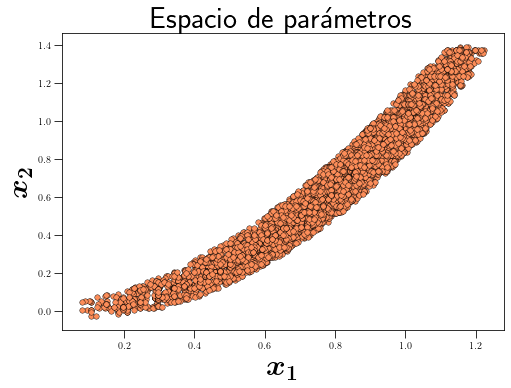

In [12]:
plt.figure(figsize=(7.2,5.5))
plt.scatter(data2['x1'], data2['x2'], s=30, edgecolor='0.0',
                linewidth=0.40, alpha=1.0, facecolor=rn_pts,
                label=r'Differential evolution: \num{{{:d}}} out of \num{{{:d}}} points')
plt.title(r'Espacio de parámetros',size=30,)
plt.xlabel(r'$\boldsymbol{x_{1}}$',size=30)
plt.ylabel(r'$\boldsymbol{x_{2}}$',size=30)
plt.tight_layout()

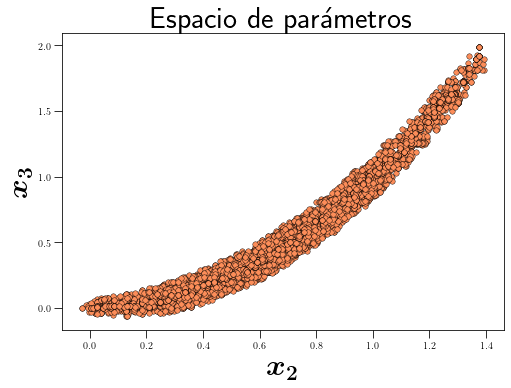

In [13]:
plt.figure(figsize=(7.2,5.5))
plt.scatter(data2['x2'], data2['x3'], s=30, edgecolor='0.0',
                linewidth=0.40, alpha=1.0, facecolor=rn_pts,
                label=r'Differential evolution: \num{{{:d}}} out of \num{{{:d}}} points')
plt.title(r'Espacio de parámetros',size=30,)
plt.xlabel(r'$\boldsymbol{x_{2}}$',size=30)
plt.ylabel(r'$\boldsymbol{x_{3}}$',size=30)
plt.tight_layout()

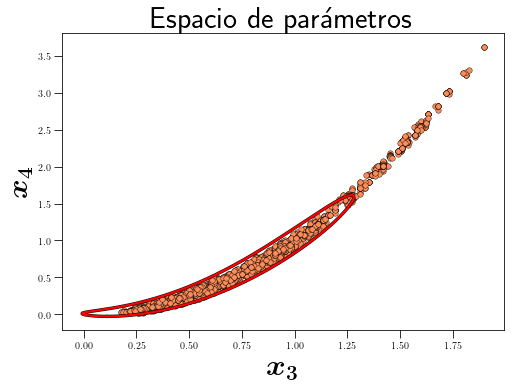

In [14]:
plt.figure(figsize=(7.2,5.5))
plt.scatter(data1['x3'], data1['x4'], s=30, edgecolor='0.0',
                linewidth=0.40, alpha=1.0, facecolor=rn_pts,
                label=r'Differential evolution: \num{{{:d}}} out of \num{{{:d}}} points')
plt.title(r'Espacio de parámetros',size=30,)
plt.xlabel(r'$\boldsymbol{x_{3}}$',size=30)
plt.ylabel(r'$\boldsymbol{x_{4}}$',size=30)
plt.tight_layout()
x1, x2, y = analytic_4d(critical_loglike)

plt.plot(x1, y, c="0.05", lw=3.3)
plt.plot(x2, y, c="0.05", lw=3.3)
plt.plot(x1, y, c="red", lw=2.2)
plt.plot(x2, y, c="red", lw=2.2,
             label=r"${0:.0f}\%$ confidence level contour".format(100. * beta))


# Modelo Z2. 

El modelo más básico de materia oscura es el conocido como singlete escalar (scalar singlet) o escenario del ''portal de Higgs escalar'' (higgs-portal), este se encarga de extender el modelo estándar con un campo escalar $S$ no cargado bajo la simetría del modelo estándar, imponiendo sobre el sistema que, el nuevo campo posea una simetría discreta $Z_{2}$ generando así una cantidad conservada similar a la paridad.   

## Lagrangiano del modelo. 

Considere el caso de un singlete real escalar $S$. Este escalar se vuelve estable cuando se posee un lagrangiano invariante bajo una simetría $Z_{2}$. Como se plantea en \cite{impact_of_vaccum} el lagrangiano tendrá la forma: 

$$  \mathcal{L} = \mathcal{L}_{SM} + \frac{1}{2} \partial_{\mu} S \partial^{\mu} S + \frac{\mu_{s}}{2} S^{2} + \frac{\lambda_{s}}{4} S^{4} + \frac{1}{2}\lambda_{SH} S^{2} H^{2} $$

Como se menciona en \cite{so} el término $\mu_{s}$ que acompaña a $S^{2}$ es conocido con el término de "bare masses", esto refiere a masas intrínsecas o en reposo de la partícula. Es debido a la interacción con otros campos, como por ejemplo, el campo de Higgs que por medio de su mecanismo o el rompimiento de la simetría que se adquiere correcciones a esta bare mass y cambian las propiedades másicas de las partículas. Otro parámetro es el que acompaña a $S^{4}$, o sea $\lambda_{s}$ este se refiere a un término de interacción o de fuerza entre la partícula escalar de materia oscura. Por último, se tiene el parámetro que relaciona a la partícula de materia oscura con el bosón H, este es $\lambda_{SH}$, este consiste en un término de fuerza que nos indica un posible decaimiento de un Higgs a dos partículas de materia oscura.

Deseamos analizar el comportamiento de las partículas cuando ocurre el rompimiento de la simetría, esto ya que la materia oscura debe tener presente una masa. Para esto, es necesario perturbar el campo de Higgs alrededor de su valor esperado de vacío. Considérese el bosón $H$ escrito de la forma $H = (h + \nu_0) / \sqrt{2}$ siendo $\nu_{0}$ el valor esperado de vacío. Cuando reemplazamos esta forma en el lagrangiano, y realizando algunos procedimientos algebráicos llegamos a la forma: 


\begin{equation}
    \mathcal{L} = \mathcal{L}_{SM} + \frac{1}{2} \partial_{\mu} S \partial^{\mu} S + \frac{1}{2}(\mu_{S} + \lambda_{SH}\nu_{0}^{2}) S^{2} + \frac{\lambda_{s}}{4} S^{4} + \nu_{0}\lambda_{SH}S^{2}h + \frac{1}{2}\lambda_{SH} S^{2} h^{2}
\end{equation}

Es posible observar a simple vista que el nuevo lagrangiano aun posee la simetría $Z_{2}$. Por otro lado, se adquiere una materia oscura con masa, que depende del cuadrado del valor esperado del vacío y de la constante de interacción entre materia oscura y Higgs $\lambda_{SH}$. También se genera un nuevo término relacionado a una interacción $S^{2}h$  cuyo parámetro de interacción está dado por $\nu_{0}\lambda_{SH}$, mientras que aún se tiene presente la interacción original $S^{2}h^{2}$ con parámetro $\frac{\lambda}{2}$. 

## Densidad reliquia.

Cuando se habla de la densidad reliquia para la materia oscura, nos referimos a la densidad de partículas presentes en el universo actualmente. Según los datos medidos por el laboratorio Planck la densidad reliquia para la materia oscura actualmente ronda el valor de $0.120 \pm 0.01$ \cite{planck}.

# Librerias. 
Es necesario importar las siguientes librerias para el funcionamientos del programa.
### chi2 
para determinar un valor razonable de chi cuadrado. 
### pandas 
Para realizar un analisis adecuado de los datos generados por el algoritmo genético.
### subprocess 
Es para ejecutar los comandos necesarios para reemplazar los valores en micrOmegas. 
### time
Solamente para medir el tiempo de optimización.
### differential_evolution. 
Este es el algoritmo genético que vamos a usar en el programa. 

In [41]:
#Es necesario importas varias librerias. 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2 #Se usa para analizar que tan acertada es la solución al valor actual. 
import pandas as pd #Para administrar los archivos.
import subprocess #Para ejecutar comandos
import time #Para mostrar los tiempos del proceso
from scipy.optimize import differential_evolution #Llamamos al algoritmo genético.

In [42]:
print(plt.style.available)
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [43]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [44]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan

Es necesario establecer unos valores límites o ligaduras. 
Dependiendo del analisis que cada uno desee llevar, las ligaduras se trabajan en escala lineal o logaritmica. 
Si deseamos realizar un analisis global de los parámetros normalmente para generar buenos resultados es conveniente usar la escala logaritmica. Mientras que, para realizar analisis detallados de zonas como lo pueden ser zonas de resonancia es común usar la escala lineal.

In [45]:
'''
lash_min = 0
lash_max = 1
mass_min = 10
mass_max = 200
'''
lash_min = -4
lash_max = 0
mass_min = 1
mass_max = 3

También es necesario usar datos experimentales para poder recrear una likelihood adecuada al programa, en este caso por ejemplo se usan los datos del LZ, los cuales se cargan desde el archivo "Lz_experiment.txt" y ademas se realizar una interolación de los valores para crear la función adecuada por medio de la cual graficarlos.

In [46]:
from scipy.interpolate import interp1d
LZ22 = np.loadtxt('Lz_experiment.txt')
fLZ22 = interp1d(LZ22[:,0],LZ22[:,2]*1e36)

Las siguientes rutinas corresponden al codigo generado para la optención de los valores por medio de micrOmegas, estas rutinas lo unico que se encargan es de ejecutar micrOmegas para calcular los respectivos valores de densidad reliquia y SI DD o sección transversal. 

La función calc(x_) retornará un vector con los datos arrojados por el programa de micrOmegas, este vector esta compuesto por densidad reliquia y SI DD.

In [47]:
def writer(file,dictionary):
    data1=open(file,'w')
    for items in dictionary.items(): 
        data1.write("%s %s\n"%items)
    data1.close()

def eje(COMMAND): 
    const = 0.0 
    dato = subprocess.getoutput(COMMAND)
    if(len(dato)>0):
        const = float(dato)
    else: 
        const = -1 
    return const

def calc(x_): 
    ruta = 'data.dat'
    rutaG = './main data.dat >temporal.dat'
    COMMAND_RQ = "grep 'Omega' temporal.dat | awk 'BEGIN{FS=\"=\"};{print $3}'"
    COMMAND_CS = "grep 'proton  SI' temporal.dat | awk '{print $3}'"
    data = {'Q':14, 'Mh':120,'laS':0.1,'laSH':0.15,'Mdm1':700}
    data['laSH'] = 10**x_[0]
    data['Mdm1'] = 10**x_[1]
    #print(x_)
    #data['laSH'] = x_[0]
    #data['Mdm1'] = x_[1]
    writer(ruta,data) 
    subprocess.getoutput(rutaG)
    datos = [0]*2
    datos[0] = eje(COMMAND_RQ) #ejecutar el comando desde la terminal 
    datos[1] = eje(COMMAND_CS)
    return datos

Es necesario construir las likelihood, de forma detallada se realiza por aparta la creación de las dos likelihood, por ejemplo l_omega es la likelihood para la densidad reliquia; mientras que, l_csection es la likelihood para la sección transversal o la detección directa independiente de espín. 

ambas funciones se encargan de recibir 2 parámetros, el primero consiste en un vector $x_$ el cual corresponde al vector que lleva la información de los parámetros que estamos estudiando en el modelo, por otro lado, se le ingresa el valor teorico calculado, el cual corresponde al hallado por micrOmegas. 

Luego la función gaussian(x_) se encarga de ejecutar calc(x_) la cual permite determinar los valores teoricos de los observables y por otro lado, retorna una likelihood compuesta por las dos funciones creadas en este apartado para así desarrollar un valor de chi cuadrado.

In [48]:
def l_omega(x_,omega_th_): 
    #lash_ = x_[0]
    #m_ = x_[1]
    lash_ = 10**x_[0]
    m_ = 10**x_[1]
    omega_th = omega_th_
    omega_ex = 0.12
    delta_omega_pdg = ((0.1*omega_th)**2 + 0.001*2)**0.5
    return (omega_th - omega_ex)**2 / delta_omega_pdg**2

def l_csection(x_,csection_):
    #lash_ = x_[0]
    #m_ = x_[1]
    lash_ = 10**x_[0]
    m_ = 10**x_[1]
    cxSI_th = csection_
    cxSI_ex = 0.0 
    delta_cxSI_th = 0.2*cxSI_th
    delta_cxSI_ex = fLZ22(m_)/1.64
    delta_cxSI = (delta_cxSI_th**2 + delta_cxSI_ex**2)**0.5
    return (cxSI_th - cxSI_ex)**2 / delta_cxSI**2

def gaussian(x_):
    #datos = calc(x_)
    #print("El valor de la likelihood rq es:", l_csection(x_,datos[1]))
    #print("El valor de la likelihood cs es:",l_omega(x_,datos[0]))
    return l_omega(x_,omegah2(x_[1],x_[0]))
    #return l_omega(x_,datos[0]) + l_csection(x_,datos[1])

Como se realiza en el codigo para la función de Rosenbrock, se usa de_scan para estudiar el espacio de parámetros, es de tener presente que en esta función debemos establecer las bounds o ligaduras, entre más cantidad de rangos (min,max) ingresemos al differential evolution este calculará más valores. Por ejemplo, para este caso, bounds esta compuesto unicamente por dos rangos, (lash_min, lash_max) y (mass_min, mass_max), estos rangos nos indica que unicamente estaremos estudiando o será de nuestro interés dos parámetros, la masa de la materia oscura y la constante de acoplamiento con el boson de Higgs. 

La rutina objective(x_) unicamente se encarga de almacenar los valores calculados por el algoritmo de micrOmegas, ademas de retornar un valor correspondiente al chi_sq_ este equivale al valor de chi cuadrado determinado por la likelihood, es importante que a la hora de trabajar con el algoritmo genético siempre retornemos un valor, esto ya que, con este mismo el algoritmo se encarga de converger a una solución adecuada.

Por otro lado, es necesario estudiar a fondo las diferentes strategy para poder determinar de manera más eficiente el espacio de parámetros, es necesario no quedarse con el uso de una sola estrategia, esto ya que es posible generar una amplia gama de datos con las otras, generando así un espacio de parámetros más completo. 

Con respecto a la popsize, entre mayor sea la población más tiempo tendremos en funcionamiento el algoritmo y mejores soluciones se tendrán, pero, debido a las pruebas, normalmente una población excesivamente grande, tiende a ser menos optima en el calculo y hace que las soluciones se repitan, por tanto, usar poblaciones superiores a 200 es innecesario y es mejor utilizar calculos en valores población entre los 50 y los 200, normalmente se usa 100. Depende mucho del tipo de problema que se posea. 

Normalmente no se suelen modificar las otras variables a excepción de seed y es que esta permite que la información generada por el algoritmo sea replicable, a su vez, con diferentes semillas es posible generar diferentes puntos del espacio de parámetros, por lo que, también se vuelve necesario su modificación.


### Nota: 
La función de_scan recibe una variable llamada nombre_, esta variable corresponde a el nombre junto con su extensión del archivo en el cual serán almacenados los datos generados por el algoritmo genético. Por defecto el nombre_ debe finalizar en una extensión .csv para evitar conflictos a la hora de almacenar los datos. 
Ademas, de_scan retorna un array, el cual contiene todo los datos generados por DE. 

In [49]:
def de_scan(nombre_):
    x = [] 
    chi_sq = [] 
    bounds = [(lash_min,lash_max),(mass_min,mass_max)]
    
    def objective(x_): 
        arreglo = [0]*3
        chi_sq_ = gaussian(x_)
        chi_sq.append(chi_sq_)
        datos = calc(x_)
        arreglo[0:1] = x_
        arreglo[2:3] = datos
        arreglo[4] = chi_sq_ 
        x.append(arreglo) 
        #print(arreglo)
        if (len(x)%1000 == 0): 
            print(len(x),end='\r')
        return chi_sq_
    
    differential_evolution(objective, bounds,
                           strategy='rand1bin', maxiter=None,
                           popsize=200, tol=0.01, mutation=(0.7, 1.99999), recombination=0.15,
                           polish=False, seed=seed)

    try: 
        column_names = ['laSH','mass','reliq','cross_section','chi']
        df = pd.DataFrame(np.array(x),columns = column_names)
        print("Los elementos del dataframe son:")
        #df_almacenado = filter(df)
        df.to_csv('datos.csv', index=False, header=None)
        print(df.head())
        print("El tamaño de los datos es:",len(df))
        print("Datos almacenados con exito")
    except:
        print("Los datos del dataframe no han podido ser almacenados")

    return np.array(x),len(x)

## Ejecutar. 
Normalmente el algoritmo se ejecuta a partir del siguiente codigo.

Primero establecemos un valor fijo de la semilla en 16, para luego a partir de este generar un valor aleatorio de la misma. 

Tenemos un tiempo inicial. 

Un llamado a la función que vamos a usar, en este caso de_scan. 

Esta función posee un sistema que te va mostrando alrededor de cuantos datos ha generado el algoritmo genético. 

Tenemos un tiempo final. 

Y un print en pantalla para mostrar la cantidad de tiempo que se demoro el archivo en correr. 

Ademas de información relevante de la cantidad de puntos generados por el algoritmo y guardos en el archivo cuyo nombre fue colocado a la función de_scan(nombre)

### Nota: 
Es necesario dejar claro que ejecutar este codigo desde el notebook puede llevar a que la generación de la información sea aun más lenta, almenos ejecutado desde jupyter notebook. Por tanto, se recomienda crear un archivo de texto con terminación .py y ejecutar el algoritmo para generar los datos. 

In [50]:
'''
seed = 16
np.random.seed(seed) 
print("Running de_scan") 
tO = time.time()
x,call = de_scan('datos.csv')
de_time = time.time() - tO 
de_time = de_time/60
print("Tiempo de ejecución: ", de_time, " minutos")
#print("Cantidad de datos generados: ", call)
print("Finalizado")
'''
print("")

Aquí lo que haremos será importar los datos desde un archivo en línea de git hub, generados por el mismo codigo usado aquí.

In [51]:
url = "datos.csv"
columnas = ['loglaSH','logmS','omegaS','sigmaSI','loglike']
### loglike means: -2log(L)
df = pd.read_csv(url,names=columnas)
df['mS'] = 10**df.logmS
df['laSH'] = 10**df.loglaSH
df['like'] = np.exp(-df.loglike/2)
df.head()

,loglaSH,logmS,omegaS,sigmaSI,loglike,mS,laSH,like
0,-1.312101,1.634656,303.00,5.081000e-05,36.476340,43.117705,0.048742,1.200227e-08
1,-3.302266,2.883779,3500.00,1.759000e-11,99.993142,765.207421,0.000499,1.935375e-22
2,-3.449902,2.584942,1690.00,3.520000e-14,99.985799,384.540020,0.000355,1.942493e-22
3,-1.847119,2.920082,7.56,1.211000e-08,96.690677,831.920234,0.014219,1.008989e-21
4,-1.478663,2.521889,242.00,4.118000e-07,30.263911,332.574346,0.033215,2.680867e-07


In [52]:
print("Cantidad de puntos generados")
print(df.shape)

Cantidad de puntos generados
(54900, 8)


In [53]:
Lmax = min(df['loglike'])
print("El valor minímo de chi cuadrado es:",Lmax)

El valor minímo de chi cuadrado es: 0.0014057556983642


In [54]:
ydata1 = df[(df['loglike'] - Lmax) < 5.99] ##2σ
ydata2 = df[(df['loglike'] - Lmax) < 2.30] ##1σ

In [55]:
print(ydata1.shape)
print(ydata2.shape)

(25578, 8)
(22799, 8)


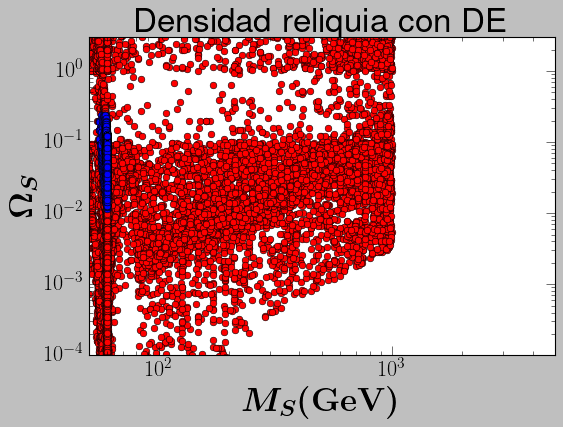

In [57]:
plt.figure(figsize=(7.2,5.5))
plt.plot(df['mS'],df['omegaS'],'ro',label='$\phi_1$', markeredgecolor='black')
plt.plot(ydata1['mS'],ydata1['omegaS'],'bo',label='$\phi_1$', markeredgecolor='black')
plt.title(r'Densidad reliquia con DE',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\Omega_S}$',size=30)
plt.xlim(50,5000)
plt.ylim(1e-4,3e0)
plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

# Modelo Z3

In [58]:
namesDD_1=['loglaS','logmS','logmu3','omegaS','sigmaSI','loglike']
namesDD_2=['logmS','loglaS','logmu3','omegaS','sigmaSI','loglike']
element = np.loadtxt('all-DE-results-singlet-DD.txt')
DE_dataDD_1 = pd.DataFrame(element,columns=namesDD_2)
DE_dataDD_1 = DE_dataDD_1[['loglaS','logmS','logmu3','omegaS','sigmaSI','loglike']]
DE_dataDD_2 = pd.read_csv('total_data.csv',names=namesDD_1)
ydata1 = pd.concat([DE_dataDD_1, DE_dataDD_2])
ydata1.head()

,loglaS,logmS,logmu3,omegaS,sigmaSI,loglike
0,0.471635,3.709488,3.540548,0.0699,2.956051e-09,3.337523e+01
1,-1.112643,2.763688,2.789867,0.8650,1.557797e-10,5.552666e+03
2,-2.476985,2.787305,2.949311,326.0000,2.610159e-13,1.061978e+09
3,-3.549151,2.595152,3.518180,652.0000,4.527985e-15,4.249475e+09
4,-2.271541,3.894180,3.022396,26800.0000,4.121268e-15,7.182336e+12


In [60]:
print(ydata1.shape)

(1051050, 6)
